In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
control_RF_feature_importance = pd.read_csv("../output/control/RF_feature_importance.csv", header=[0], index_col=0)
miNNseq_RF_feature_importance = pd.read_csv("../output/miNNseq/RF_feature_importance.csv", header=[0], index_col=0)
control_RF_feature_importance

,Gender,Age,Left ear/Right ear,Days from onset to treatment(absolute),days from onset to treatment (categorized),Vertigo,Ear blockage,Tinnitus,Hypertension,Diabetes,...,Mean hearing threshold (affected side),WHO classify (affected side),Curve type (affected side),Mean hearing threshold (contralateral),WHO classify (contralateral),Curve type (contralateral),loudness recruitment(affected side),ABR,DPOAE response,target
0,0.008836,0.081537,0.009910,0.097330,0.053351,0.008382,0.010162,0.007668,0.007158,0.005620,...,0.063859,0.018474,0.028470,0.060033,0.011077,0.011280,0.009237,0.006140,0.012315,minor
1,0.007131,0.084524,0.009072,0.099478,0.050725,0.011237,0.013450,0.009175,0.005625,0.004368,...,0.058885,0.016994,0.022515,0.058783,0.013327,0.009687,0.007130,0.006125,0.017782,minor
2,0.008044,0.073486,0.008803,0.096585,0.046882,0.007130,0.007556,0.008424,0.004873,0.006558,...,0.067361,0.019432,0.025625,0.054007,0.015648,0.007145,0.008635,0.007049,0.016955,minor
3,0.007095,0.072819,0.008493,0.100507,0.059815,0.008196,0.011033,0.009815,0.006750,0.006696,...,0.056147,0.017088,0.025146,0.059843,0.013582,0.008053,0.008485,0.005990,0.012784,minor
4,0.008057,0.075577,0.011734,0.092202,0.050494,0.009183,0.009137,0.006864,0.007571,0.008779,...,0.062315,0.018046,0.022197,0.054862,0.012301,0.009589,0.009300,0.005815,0.016049,minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.010480,0.065164,0.010738,0.075304,0.031154,0.009547,0.009769,0.006262,0.006678,0.004547,...,0.106385,0.043598,0.020345,0.048779,0.010237,0.011220,0.009811,0.042736,0.047000,all
46,0.009023,0.060667,0.012232,0.068224,0.032205,0.009826,0.014057,0.004279,0.006919,0.005401,...,0.109438,0.042680,0.022543,0.051965,0.008331,0.009169,0.012819,0.026728,0.059281,all
47,0.006495,0.070558,0.009024,0.064035,0.023933,0.011793,0.012138,0.007173,0.007370,0.004101,...,0.097100,0.043184,0.031013,0.052694,0.012010,0.013717,0.007063,0.030516,0.070091,all
48,0.008410,0.068571,0.010429,0.073692,0.029004,0.008904,0.011276,0.006780,0.009793,0.004353,...,0.102230,0.046681,0.032806,0.046393,0.008784,0.008674,0.013951,0.028207,0.046881,all


In [3]:
def boxplot(data, x=None, y=None, hue=None, pairs=None, xlabel=None, ylabel=None, xticklabels=None, output_path: str = None, figsize: tuple = (24, 12)):
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=figsize)

    ax = sns.boxplot(data=data, x=x, y=y, hue=hue)

    if pairs:
        annotator = Annotator(ax, pairs, data=data, x=x, y=y, hue=hue)
        annotator.configure(test="Mann-Whitney", text_format="star")
        annotator.apply_and_annotate()

    plt.legend()
    plt.grid(False)

    if xlabel is not None:
        plt.xlabel(xlabel)
        plt.xticks(rotation=90)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if xticklabels:
        ax.set_xticklabels(labels=xticklabels)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
    plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Curve type (affected side)_full vs. Curve type (affected side)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:1.075e-10 U_stat=2.187e+03
ABR_full vs. ABR_all: Mann-Whitney-Wilcoxon test two-sided, P_val:3.966e-17 U_stat=2.471e+03
DPOAE response_full vs. DPOAE response_all: Mann-Whitney-Wilcoxon test two-sided, P_val:7.504e-18 U_stat=2.499e+03
Days from onset to treatment(absolute)_full vs. Days from onset to treatment(absolute)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-11 U_stat=3.100e+02
days from onset to treatment (categorized)_important vs. days from onset to treatment (categorized)_full: Mann-Whitney-Wilcoxon test two-sided, P_val:2.020e-16 U_stat=2.443e+03
Age_full vs. Age_all: Mann-Whitney-Wilcoxon test two-sided, P_val:4.423e-13 U_stat=2.301e+03
Age_important vs. Age_full: 

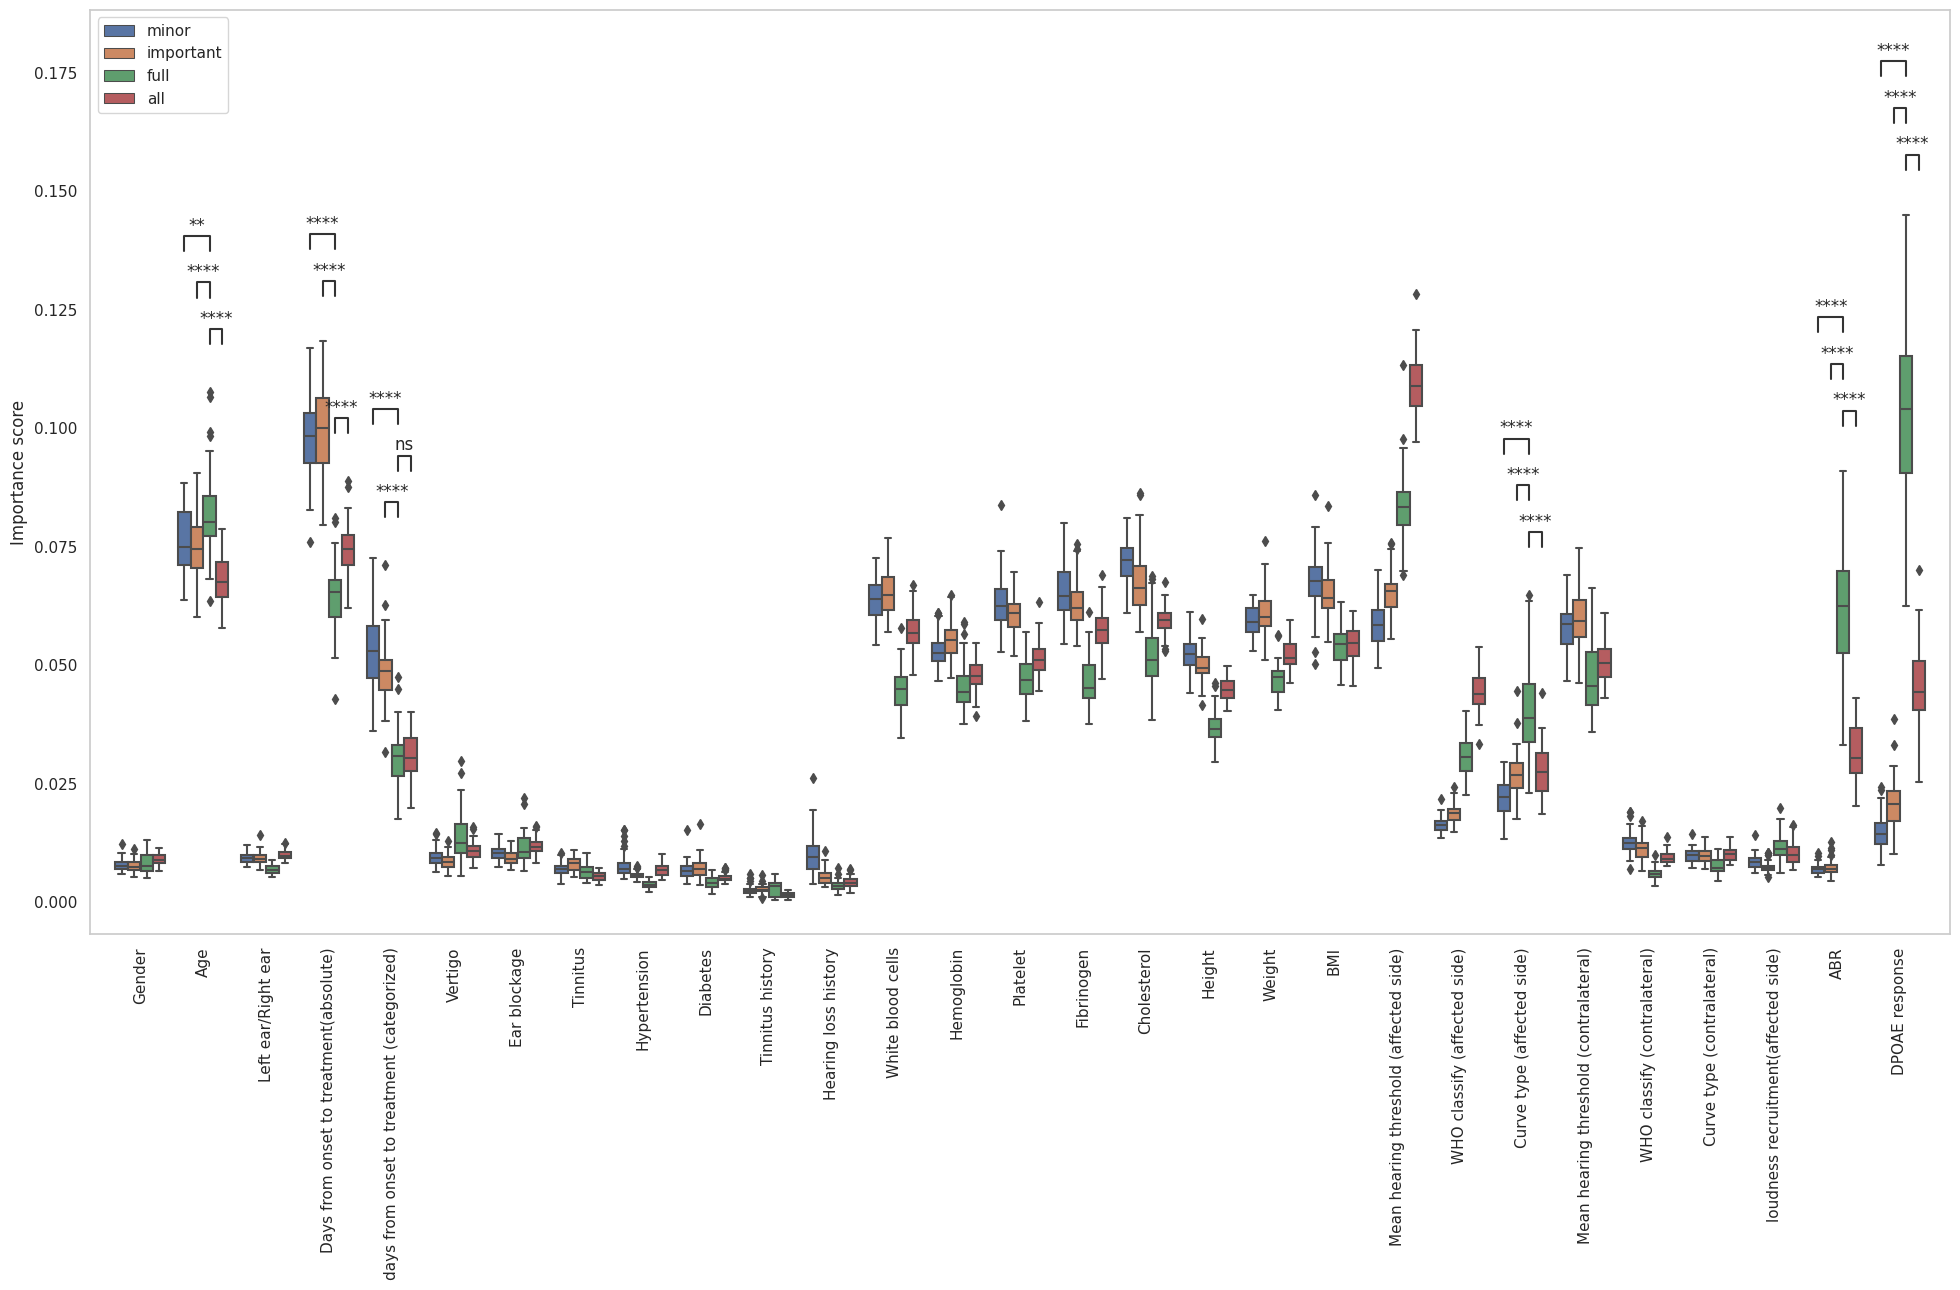

In [4]:
boxplot(
    pd.melt(control_RF_feature_importance, value_vars=control_RF_feature_importance.reset_index().columns.drop(["index", "target"]), id_vars=["target"]),
    x="variable",
    y="value",
    hue="target",
    pairs=[
        (("Age", "full"), ("Age", "minor")),
        (("Age", "full"), ("Age", "important")),
        (("Age", "full"), ("Age", "all")),

        (("Days from onset to treatment(absolute)", "full"), ("Days from onset to treatment(absolute)", "minor")),
        (("Days from onset to treatment(absolute)", "full"), ("Days from onset to treatment(absolute)", "important")),
        (("Days from onset to treatment(absolute)", "full"), ("Days from onset to treatment(absolute)", "all")),

        (("days from onset to treatment (categorized)", "full"), ("days from onset to treatment (categorized)", "minor")),
        (("days from onset to treatment (categorized)", "full"), ("days from onset to treatment (categorized)", "important")),
        (("days from onset to treatment (categorized)", "full"), ("days from onset to treatment (categorized)", "all")),

        (("Curve type (affected side)", "full"), ("Curve type (affected side)", "minor")),
        (("Curve type (affected side)", "full"), ("Curve type (affected side)", "important")),
        (("Curve type (affected side)", "full"), ("Curve type (affected side)", "all")),

        (("ABR", "full"), ("ABR", "minor")),
        (("ABR", "full"), ("ABR", "important")),
        (("ABR", "full"), ("ABR", "all")),

        (("DPOAE response", "full"), ("DPOAE response", "minor")),
        (("DPOAE response", "full"), ("DPOAE response", "important")),
        (("DPOAE response", "full"), ("DPOAE response", "all")),
    ],
    xlabel="",
    ylabel="Importance score",
    output_path="../output/control/RF_feature_importance.pdf",
)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Mean hearing threshold (affected side)_full vs. Mean hearing threshold (affected side)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:5.150e-13 U_stat=2.020e+02
Curve type (affected side)_full vs. Curve type (affected side)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:2.811e-12 U_stat=2.264e+03
ABR_full vs. ABR_all: Mann-Whitney-Wilcoxon test two-sided, P_val:8.462e-18 U_stat=2.497e+03
DPOAE response_full vs. DPOAE response_all: Mann-Whitney-Wilcoxon test two-sided, P_val:7.066e-18 U_stat=2.500e+03
Days from onset to treatment(absolute)_full vs. Days from onset to treatment(absolute)_all: Mann-Whitney-Wilcoxon test two-sided, P_val:1.280e-06 U_stat=5.470e+02
days from onset to treatment (categorized)_important vs. days from onset to treatment (categorized)_full: Mann-Whitney-Wilcoxon test tw

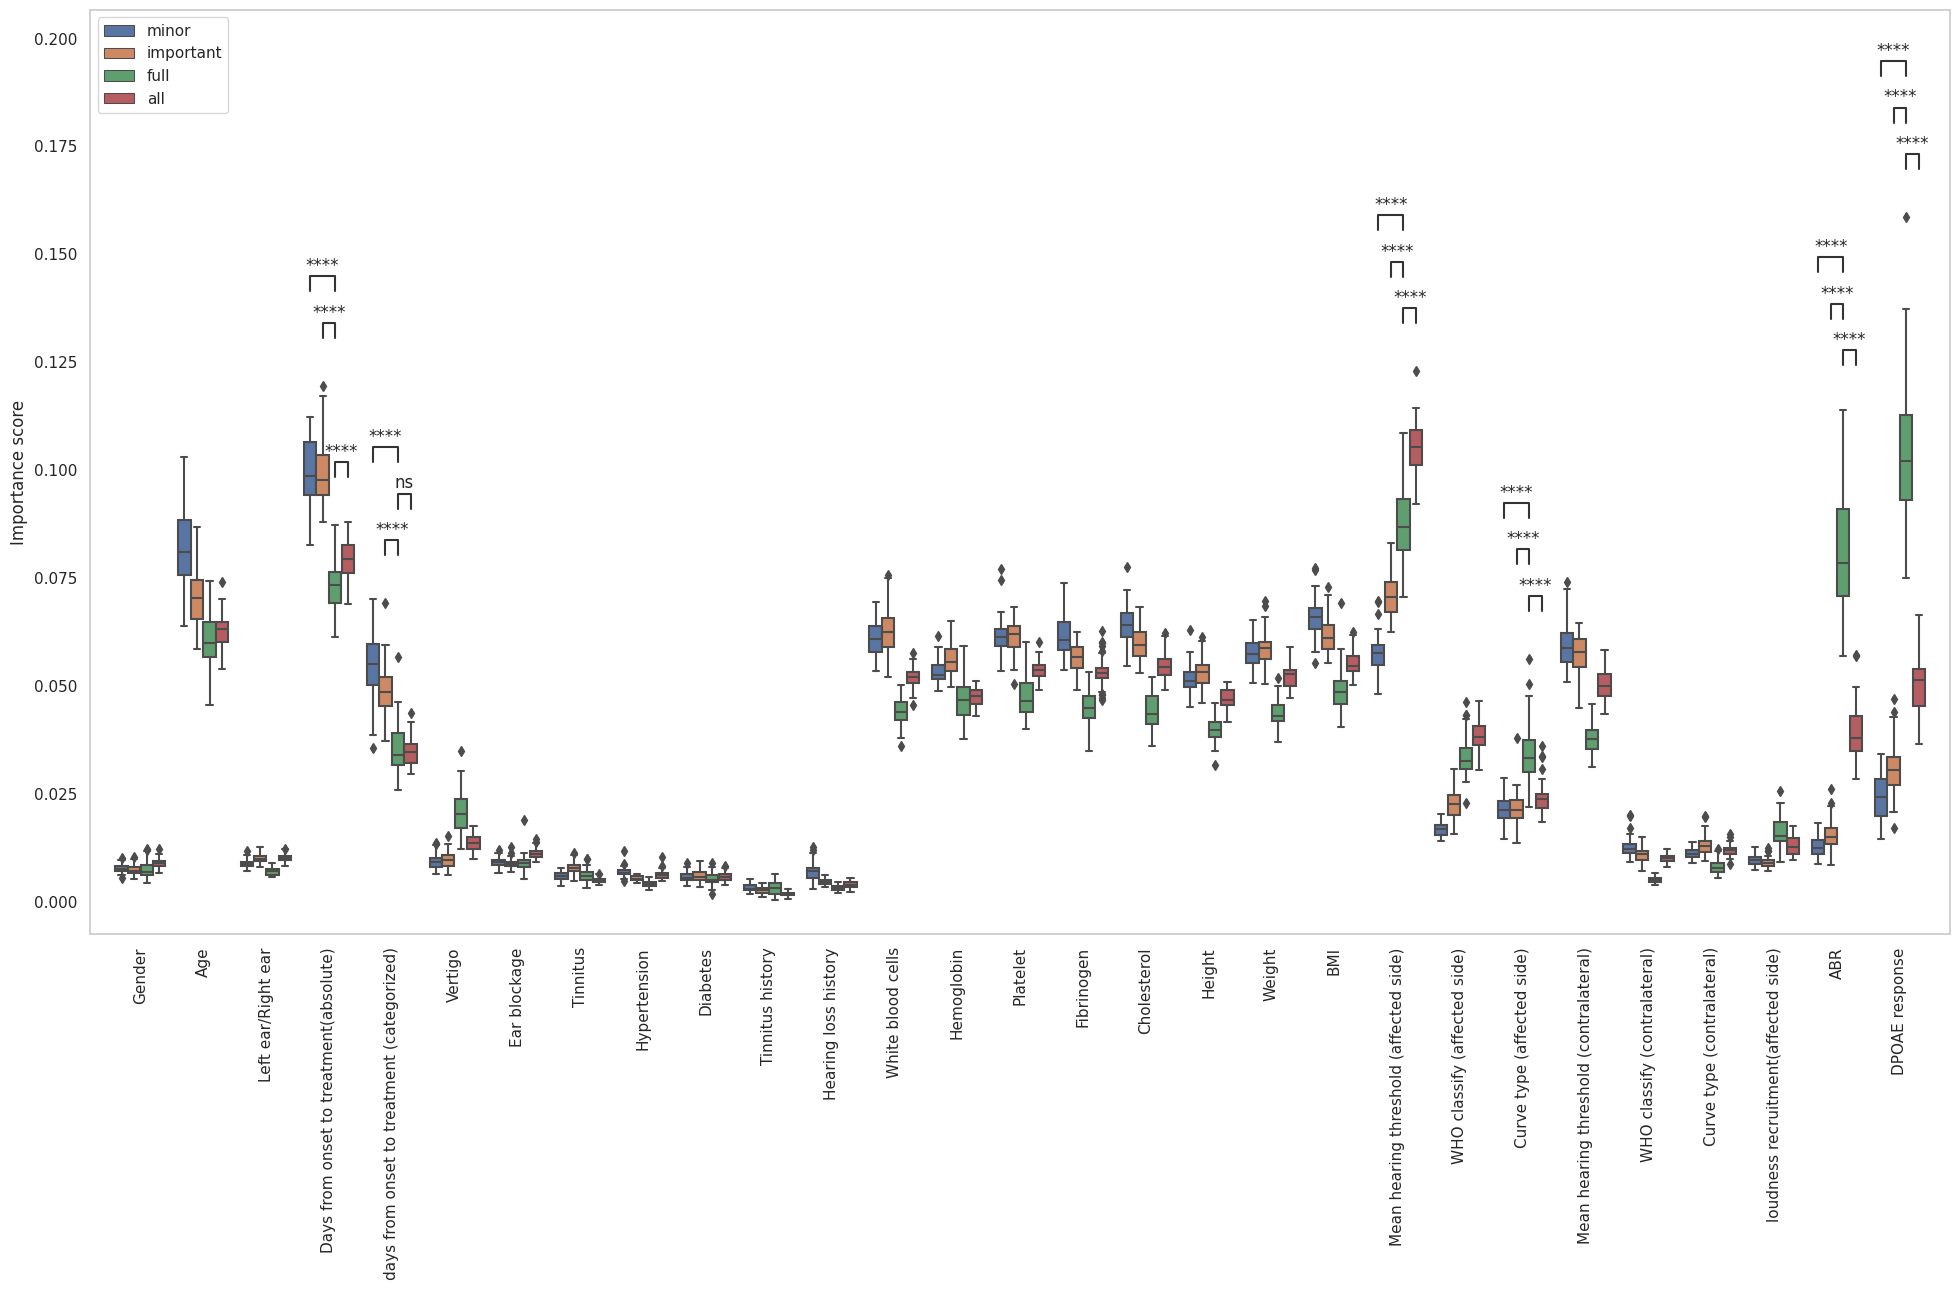

In [5]:
boxplot(
    pd.melt(miNNseq_RF_feature_importance, value_vars=miNNseq_RF_feature_importance.reset_index().columns.drop(["index", "target"]), id_vars=["target"]),
    x="variable",
    y="value",
    hue="target",
    pairs=[
        (("Days from onset to treatment(absolute)", "full"), ("Days from onset to treatment(absolute)", "minor")),
        (("Days from onset to treatment(absolute)", "full"), ("Days from onset to treatment(absolute)", "important")),
        (("Days from onset to treatment(absolute)", "full"), ("Days from onset to treatment(absolute)", "all")),

        (("days from onset to treatment (categorized)", "full"), ("days from onset to treatment (categorized)", "minor")),
        (("days from onset to treatment (categorized)", "full"), ("days from onset to treatment (categorized)", "important")),
        (("days from onset to treatment (categorized)", "full"), ("days from onset to treatment (categorized)", "all")),

        (("Mean hearing threshold (affected side)", "full"), ("Mean hearing threshold (affected side)", "minor")),
        (("Mean hearing threshold (affected side)", "full"), ("Mean hearing threshold (affected side)", "important")),
        (("Mean hearing threshold (affected side)", "full"), ("Mean hearing threshold (affected side)", "all")),

        (("Curve type (affected side)", "full"), ("Curve type (affected side)", "minor")),
        (("Curve type (affected side)", "full"), ("Curve type (affected side)", "important")),
        (("Curve type (affected side)", "full"), ("Curve type (affected side)", "all")),

        (("ABR", "full"), ("ABR", "minor")),
        (("ABR", "full"), ("ABR", "important")),
        (("ABR", "full"), ("ABR", "all")),

        (("DPOAE response", "full"), ("DPOAE response", "minor")),
        (("DPOAE response", "full"), ("DPOAE response", "important")),
        (("DPOAE response", "full"), ("DPOAE response", "all")),
    ],
    xlabel="",
    ylabel="Importance score",
    output_path="../output/miNNseq/RF_feature_importance.pdf",
)

In [6]:
miNNseq_RF_feature_importance

,Gender,Age,Left ear/Right ear,Days from onset to treatment(absolute),days from onset to treatment (categorized),Vertigo,Ear blockage,Tinnitus,Hypertension,Diabetes,...,Mean hearing threshold (affected side),WHO classify (affected side),Curve type (affected side),Mean hearing threshold (contralateral),WHO classify (contralateral),Curve type (contralateral),loudness recruitment(affected side),ABR,DPOAE response,target
0,0.008714,0.073909,0.007590,0.094687,0.051625,0.007797,0.010013,0.007373,0.006156,0.004992,...,0.069371,0.020266,0.028000,0.057314,0.011043,0.009772,0.007615,0.014830,0.031187,minor
1,0.008459,0.071122,0.009105,0.094760,0.057148,0.007347,0.008407,0.005692,0.006112,0.007146,...,0.055867,0.015112,0.020634,0.055613,0.011308,0.010969,0.008887,0.009450,0.019704,minor
2,0.007321,0.083999,0.010830,0.103696,0.054085,0.008733,0.008292,0.005266,0.006353,0.004977,...,0.050455,0.015965,0.021594,0.063188,0.013770,0.010935,0.010308,0.008688,0.026278,minor
3,0.007564,0.080642,0.008601,0.091804,0.043381,0.013315,0.009608,0.005790,0.008234,0.007467,...,0.066673,0.015722,0.017104,0.060585,0.014988,0.010136,0.010302,0.013531,0.021119,minor
4,0.008086,0.075310,0.009003,0.094169,0.038658,0.008176,0.010208,0.006585,0.006935,0.005258,...,0.069691,0.017383,0.020611,0.054519,0.010951,0.010588,0.009583,0.011664,0.028279,minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.009219,0.061135,0.010471,0.087246,0.039251,0.013370,0.013100,0.005508,0.006636,0.003933,...,0.099386,0.040107,0.025406,0.043368,0.008275,0.010540,0.012795,0.037424,0.050227,all
46,0.008362,0.056603,0.010644,0.078716,0.035120,0.016258,0.011169,0.005194,0.005968,0.006506,...,0.102478,0.038305,0.024974,0.050022,0.010293,0.011179,0.010353,0.031983,0.062191,all
47,0.008279,0.063861,0.010338,0.080014,0.037698,0.017457,0.013471,0.004278,0.007674,0.008119,...,0.110141,0.036257,0.024803,0.055998,0.008752,0.011935,0.013497,0.028961,0.040118,all
48,0.007716,0.063241,0.010082,0.080517,0.035534,0.014160,0.012514,0.004514,0.005253,0.006058,...,0.095895,0.037181,0.021366,0.047824,0.010501,0.010486,0.009704,0.040753,0.057649,all


In [7]:
for target in miNNseq_RF_feature_importance["target"].unique():
    miNNseq_RF_feature_importance[miNNseq_RF_feature_importance["target"] == target]
    print(target)

minor
important
full
all


In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from ssnhl.util import load_data, train_model

In [9]:
def calculate(X, y):
    n_class = np.unique(y).size

    functions = [
        RandomForestClassifier,
    ]
    results, rocs = dict(), dict()
    for function in functions:
        accuracy, roc = [], [[], [], []]
        for random_state in range(1, 51):
            clf = function(n_estimators=100, random_state=random_state)

            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=random_state
            )
            _accuracy, _roc = train_model(
                clf, X_train, y_train, X_test, y_test, n_class
            )

            accuracy.append(_accuracy)
            roc[0].append(_roc[0].tolist())
            roc[1].append(_roc[1].tolist())
            roc[2].append(_roc[2])

        results[clf.__class__.__name__] = accuracy
        rocs[clf.__class__.__name__] = roc

    return results, rocs

In [10]:
target_maps = {
    "minor": {0: 0, 1: 1, 2: 1, 3: 1},
    "important": {0: 0, 1: 0, 2: 1, 3: 1},
    "full": {0: 0, 1: 0, 2: 0, 3: 1},
    "all": {0: 0, 1: 1, 2: 2, 3: 3},
}

def run(data_path, ignore_order, target_map, preprocess_func):
    X, y, filter_data = load_data(data_path, preprocess_func)

    _y = y.copy()
    for origin_class in target_map:
        _y[_y == origin_class] = target_map[origin_class]

    results = dict(accs=dict(), aucs=dict())
    for i in range(len(ignore_order)):
        column_names = ignore_order[:i]
        column_ids = [filter_data.columns.get_loc(col) for col in column_names]
        _X = np.delete(X, column_ids, axis=1)

        accs, rocs = calculate(_X, _y)
        results["accs"][i] = accs["RandomForestClassifier"]
        results["aucs"][i] = rocs["RandomForestClassifier"][2]
    
    for key in results.keys():
        _df = pd.DataFrame(results[key])
        _df = pd.melt(_df, value_vars=_df.columns)
        _df = _df.rename(columns={"variable": "Number of deleted features", "value": key})
        results[key] = _df

    return results

def pointplot(data, x=None, y=None, hue=None, xticklabels=None, output_path: str = None, figsize: tuple = (24, 12)):
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=figsize)

    ax = sns.pointplot(data=data, x=x, y=y, hue=hue, markers=["."], capsize=0.2)

    if hue:
        plt.legend(loc='lower right')
    plt.grid(False)

    if x:
        plt.xlabel(x)
    if y:
        plt.ylabel(y)
    if xticklabels:
        ax.set_xticklabels(labels=xticklabels)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
    plt.show()


In [11]:
results = {}
for target in target_maps.keys():
    results[target] = run(
        "../raw_data/all.xlsx",
        miNNseq_RF_feature_importance[miNNseq_RF_feature_importance["target"] == target].mean().sort_values().index,
        target_maps[target],
        "miNNseq"
    )

/tmp/ipykernel_4007579/2712200920.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  miNNseq_RF_feature_importance[miNNseq_RF_feature_importance["target"] == target].mean().sort_values().index,


best k:  15


/tmp/ipykernel_4007579/2712200920.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  miNNseq_RF_feature_importance[miNNseq_RF_feature_importance["target"] == target].mean().sort_values().index,


best k:  15


/tmp/ipykernel_4007579/2712200920.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  miNNseq_RF_feature_importance[miNNseq_RF_feature_importance["target"] == target].mean().sort_values().index,


best k:  15


/tmp/ipykernel_4007579/2712200920.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  miNNseq_RF_feature_importance[miNNseq_RF_feature_importance["target"] == target].mean().sort_values().index,


best k:  15


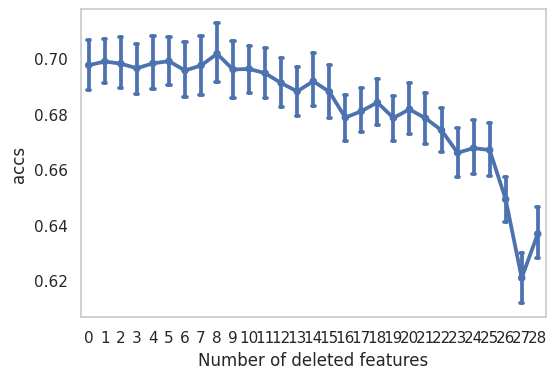

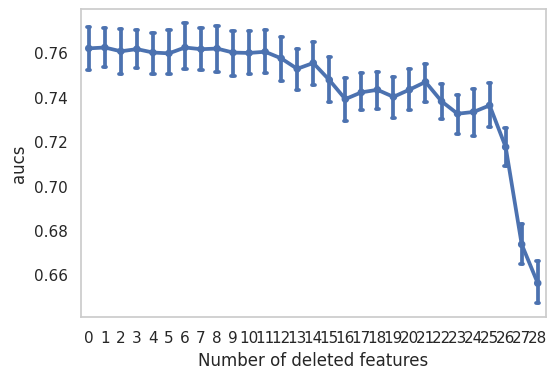

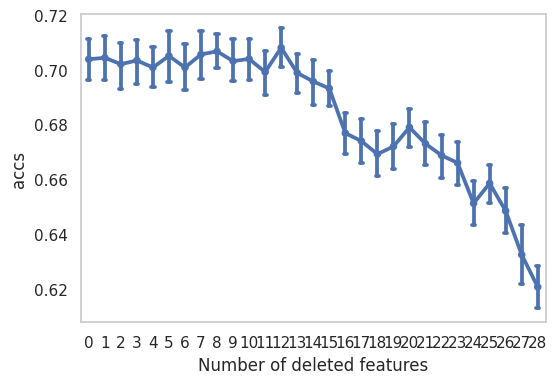

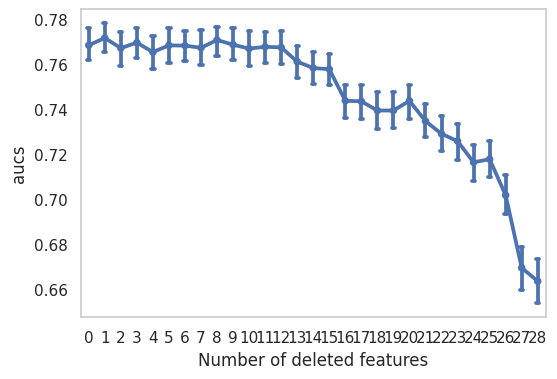

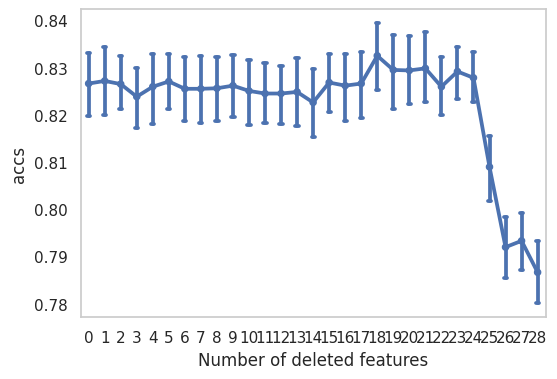

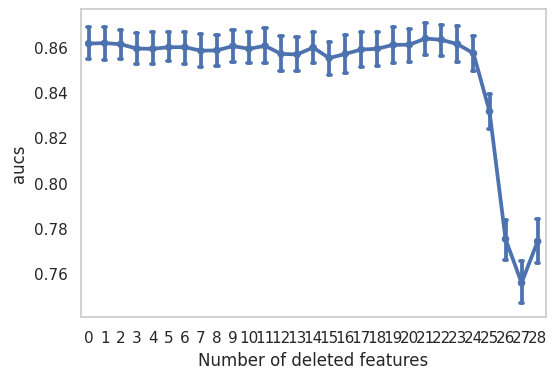

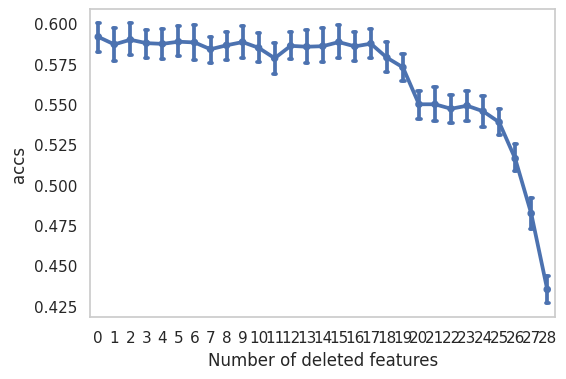

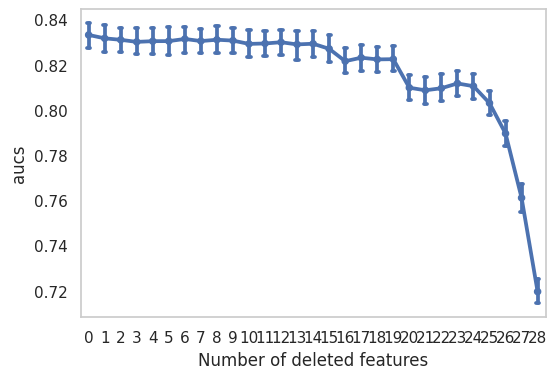

In [12]:
for target in target_maps.keys():
    pointplot(
        data = results[target]["accs"],
        x = "Number of deleted features",
        y = "accs",
        output_path = "../output/miNNseq/RF_feature_importance_{}_acc.pdf".format(target),
        figsize = (6, 4)
    )
    pointplot(
        data = results[target]["aucs"],
        x = "Number of deleted features",
        y = "aucs",
        output_path = "../output/miNNseq/RF_feature_importance_{}_auc.pdf".format(target),
        figsize = (6, 4)
    )

[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,

/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,recall,precision,f1,accuracy,auc
DecisionTreeClassifier,0.924171,0.656566,0.767717,0.716346,0.731303


[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,

/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,recall,precision,f1,accuracy,auc
DecisionTreeClassifier,0.770701,0.636842,0.697406,0.747596,0.786575


[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,

/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,recall,precision,f1,accuracy,auc
DecisionTreeClassifier,0.550562,0.859649,0.671233,0.884615,0.855994


[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,

/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/liminghong/miniconda3/envs/SSNHL/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,recall,precision,f1,accuracy,auc
DecisionTreeClassifier,0.037037,1.0,0.071429,0.799228,0.217938


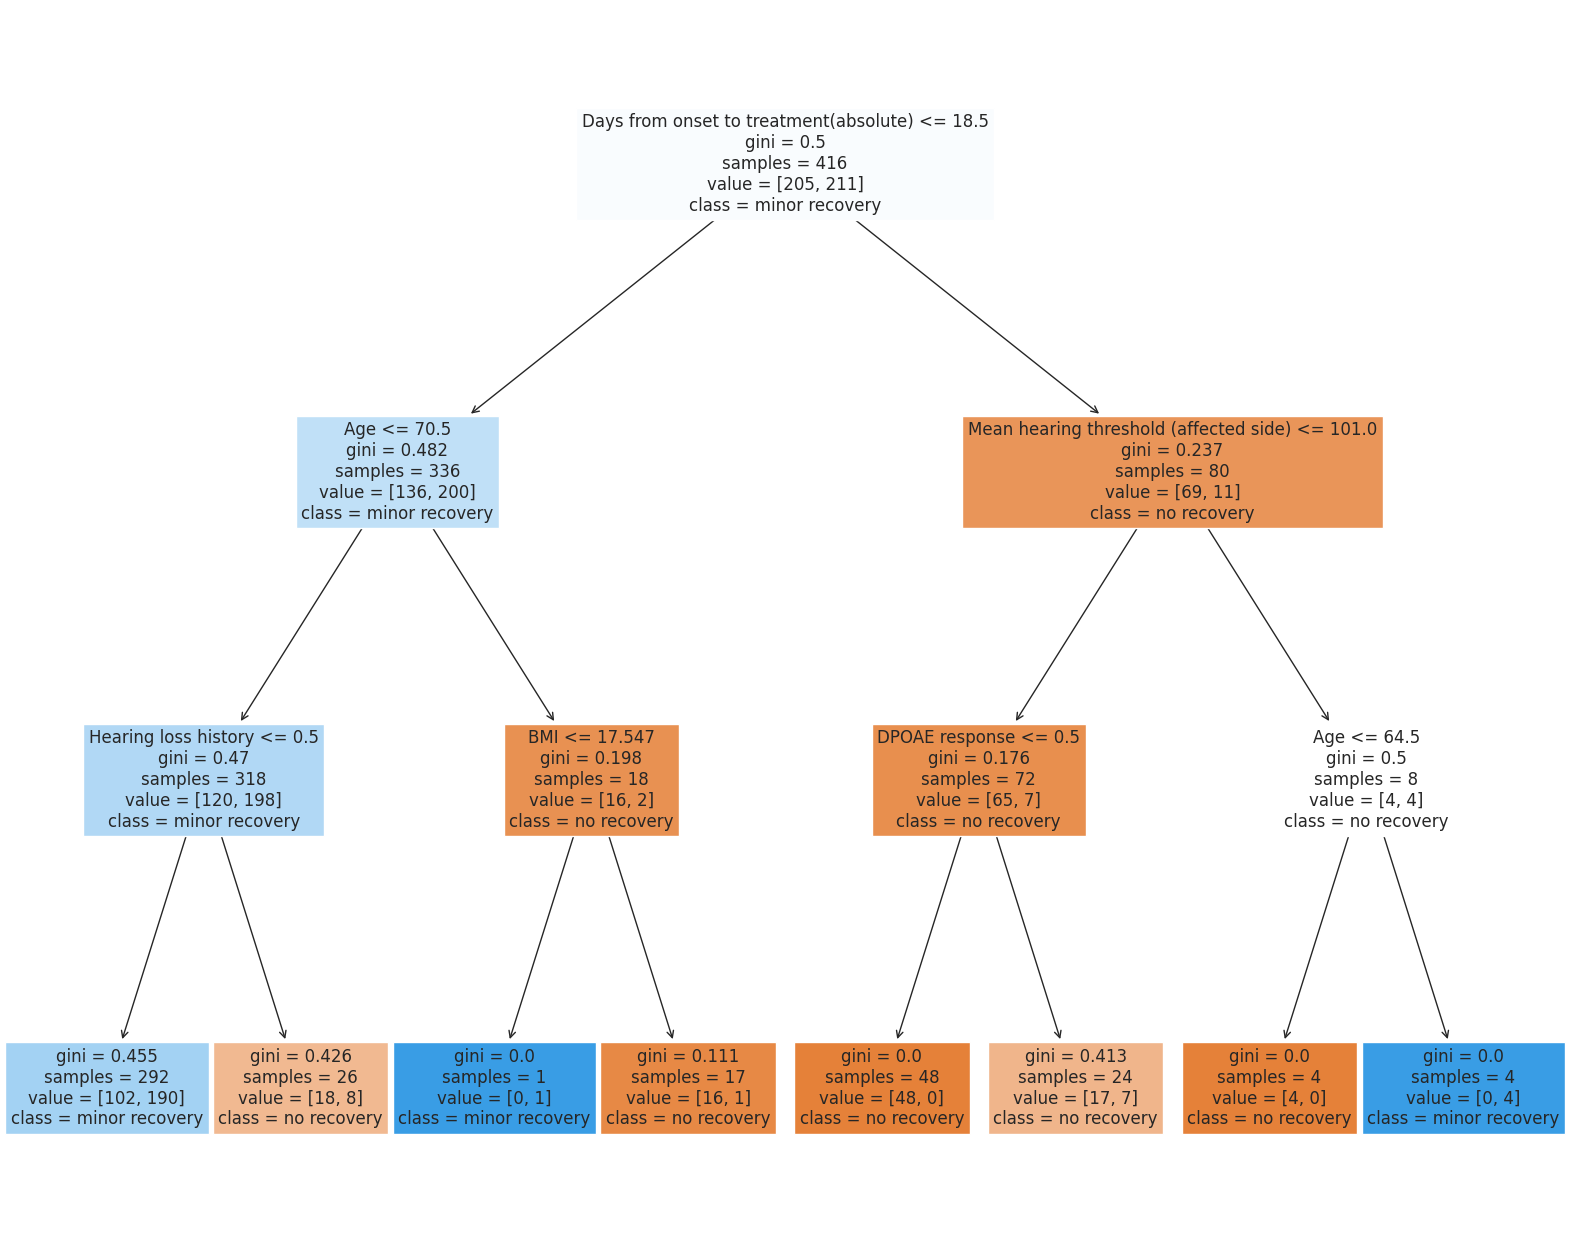

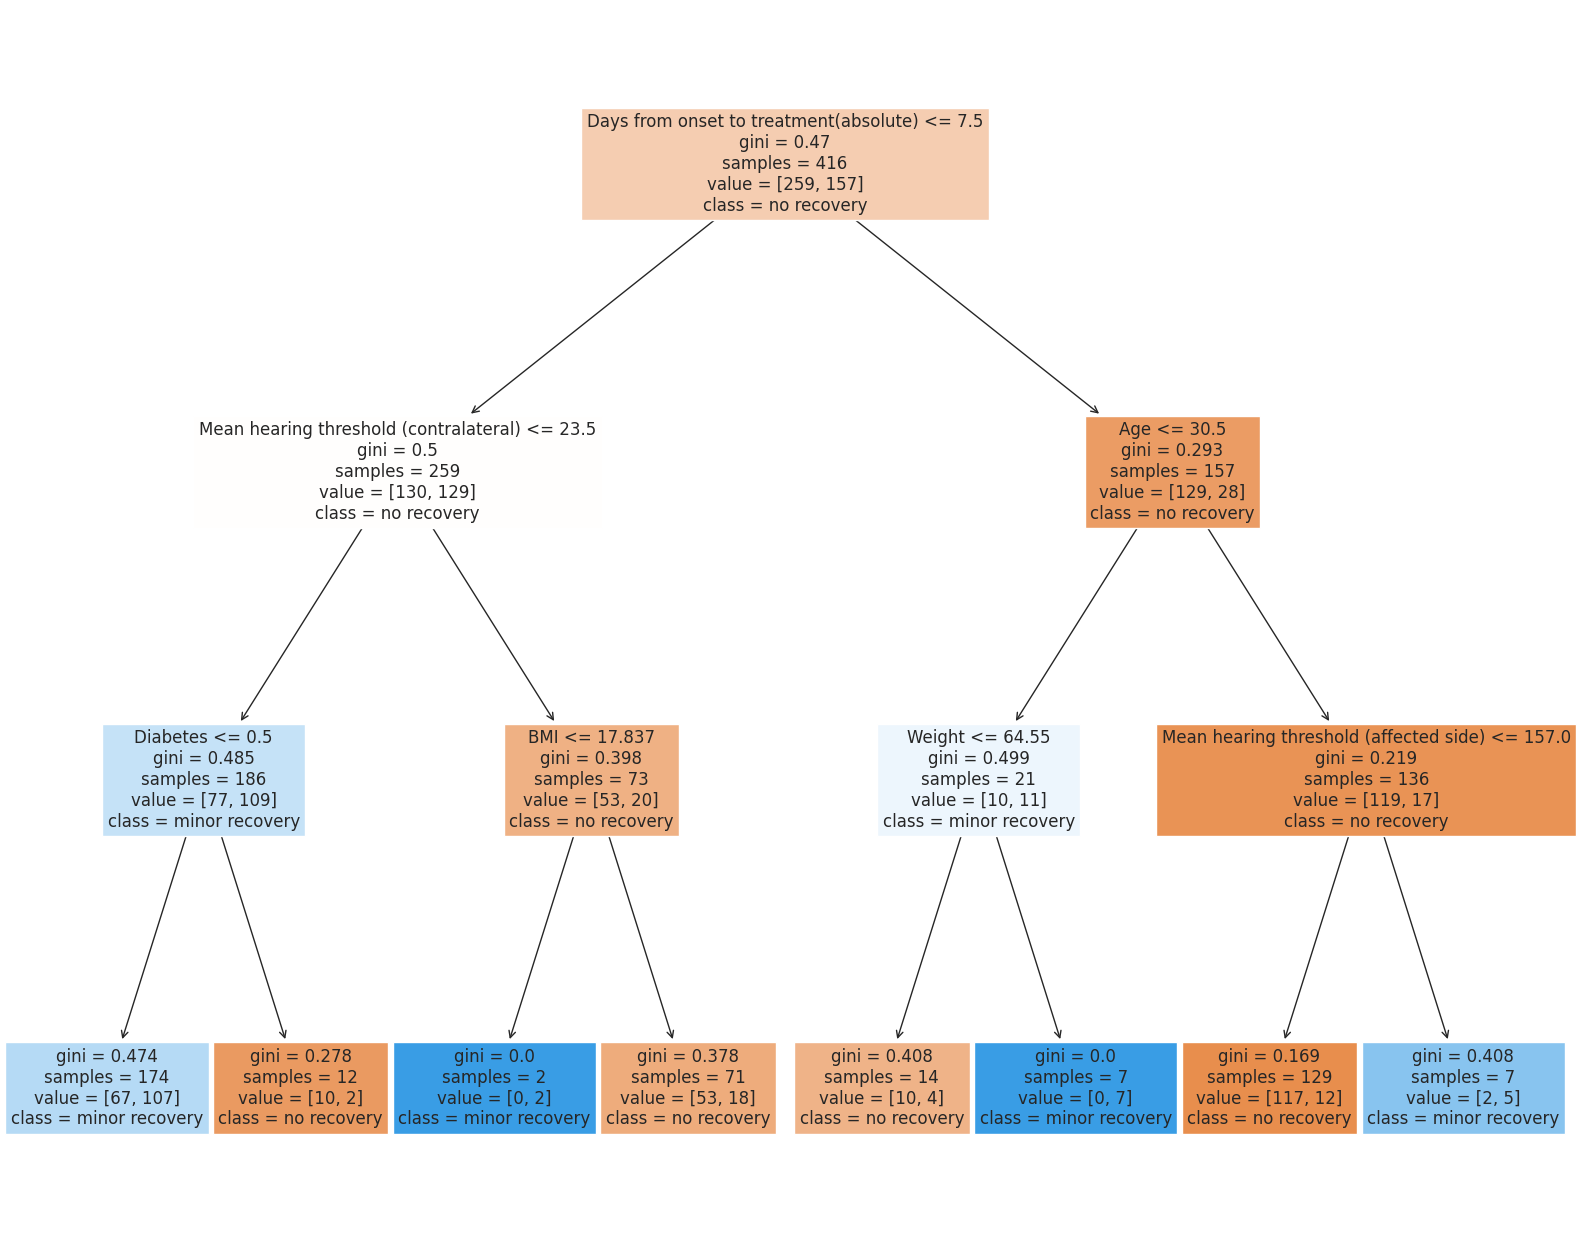

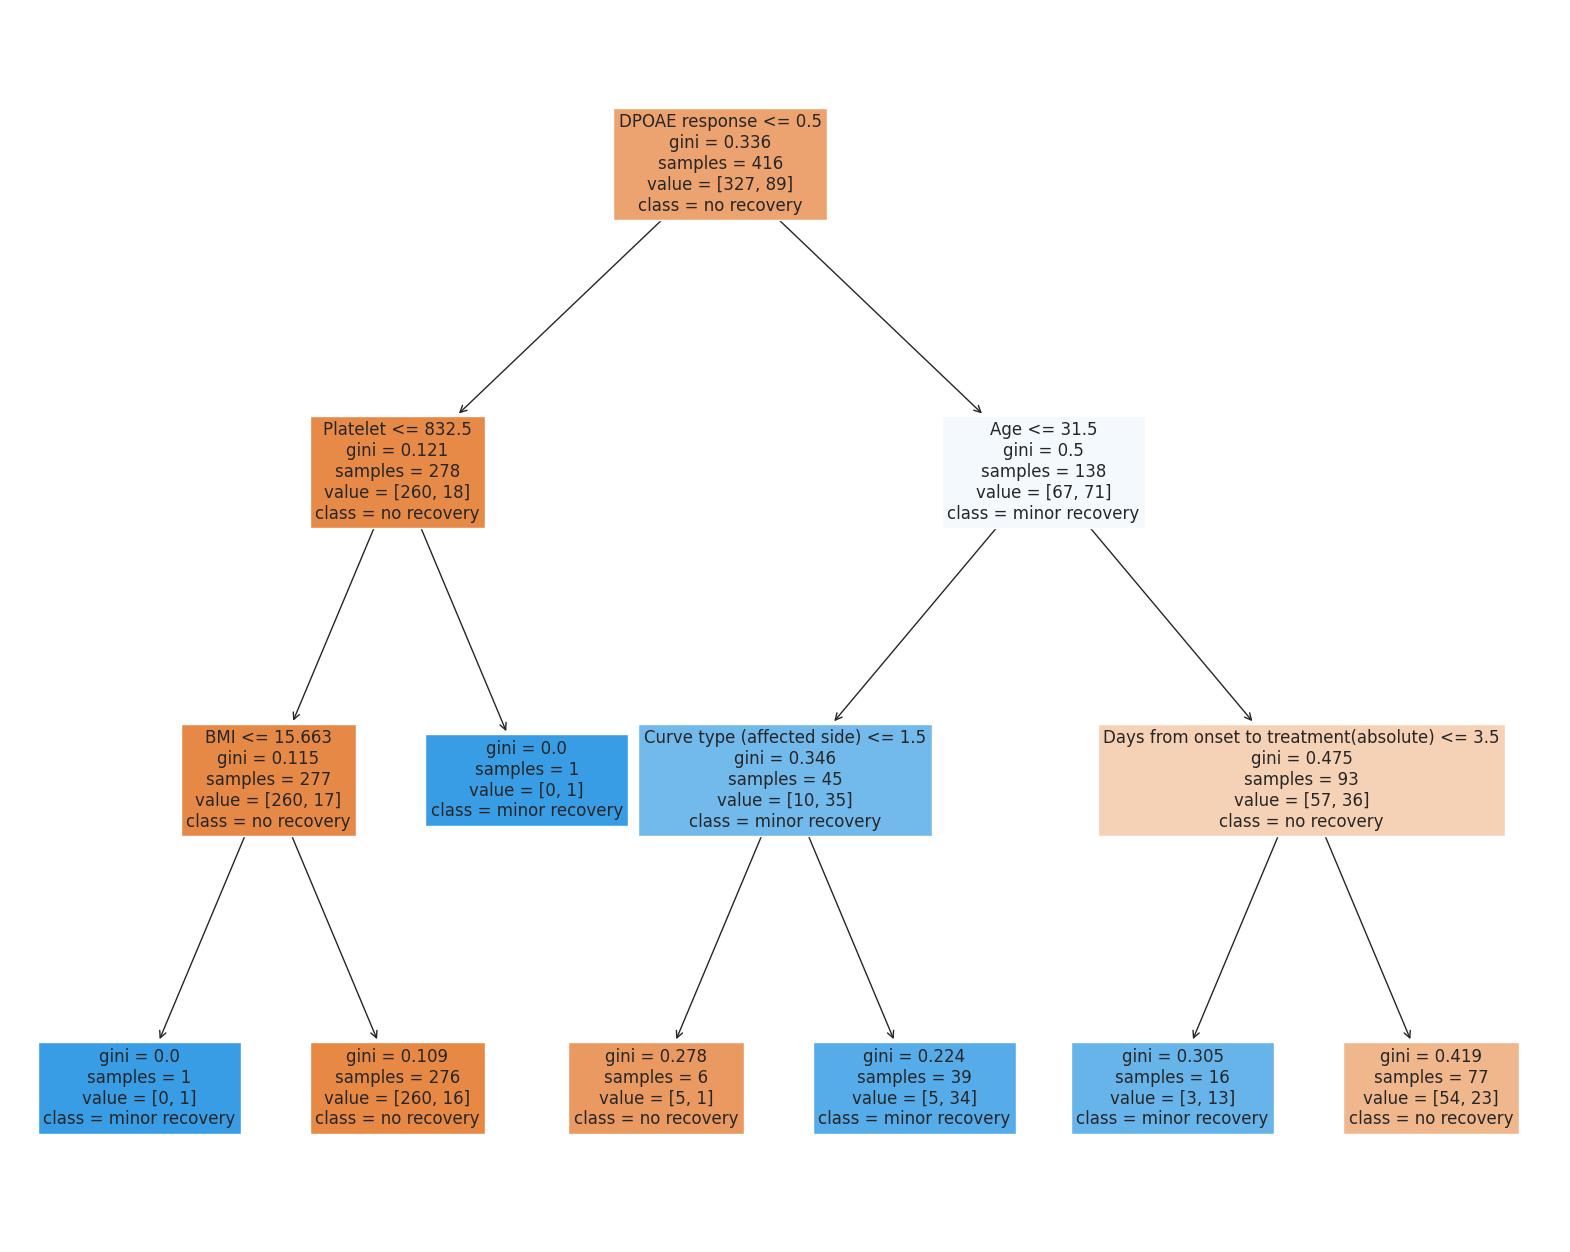

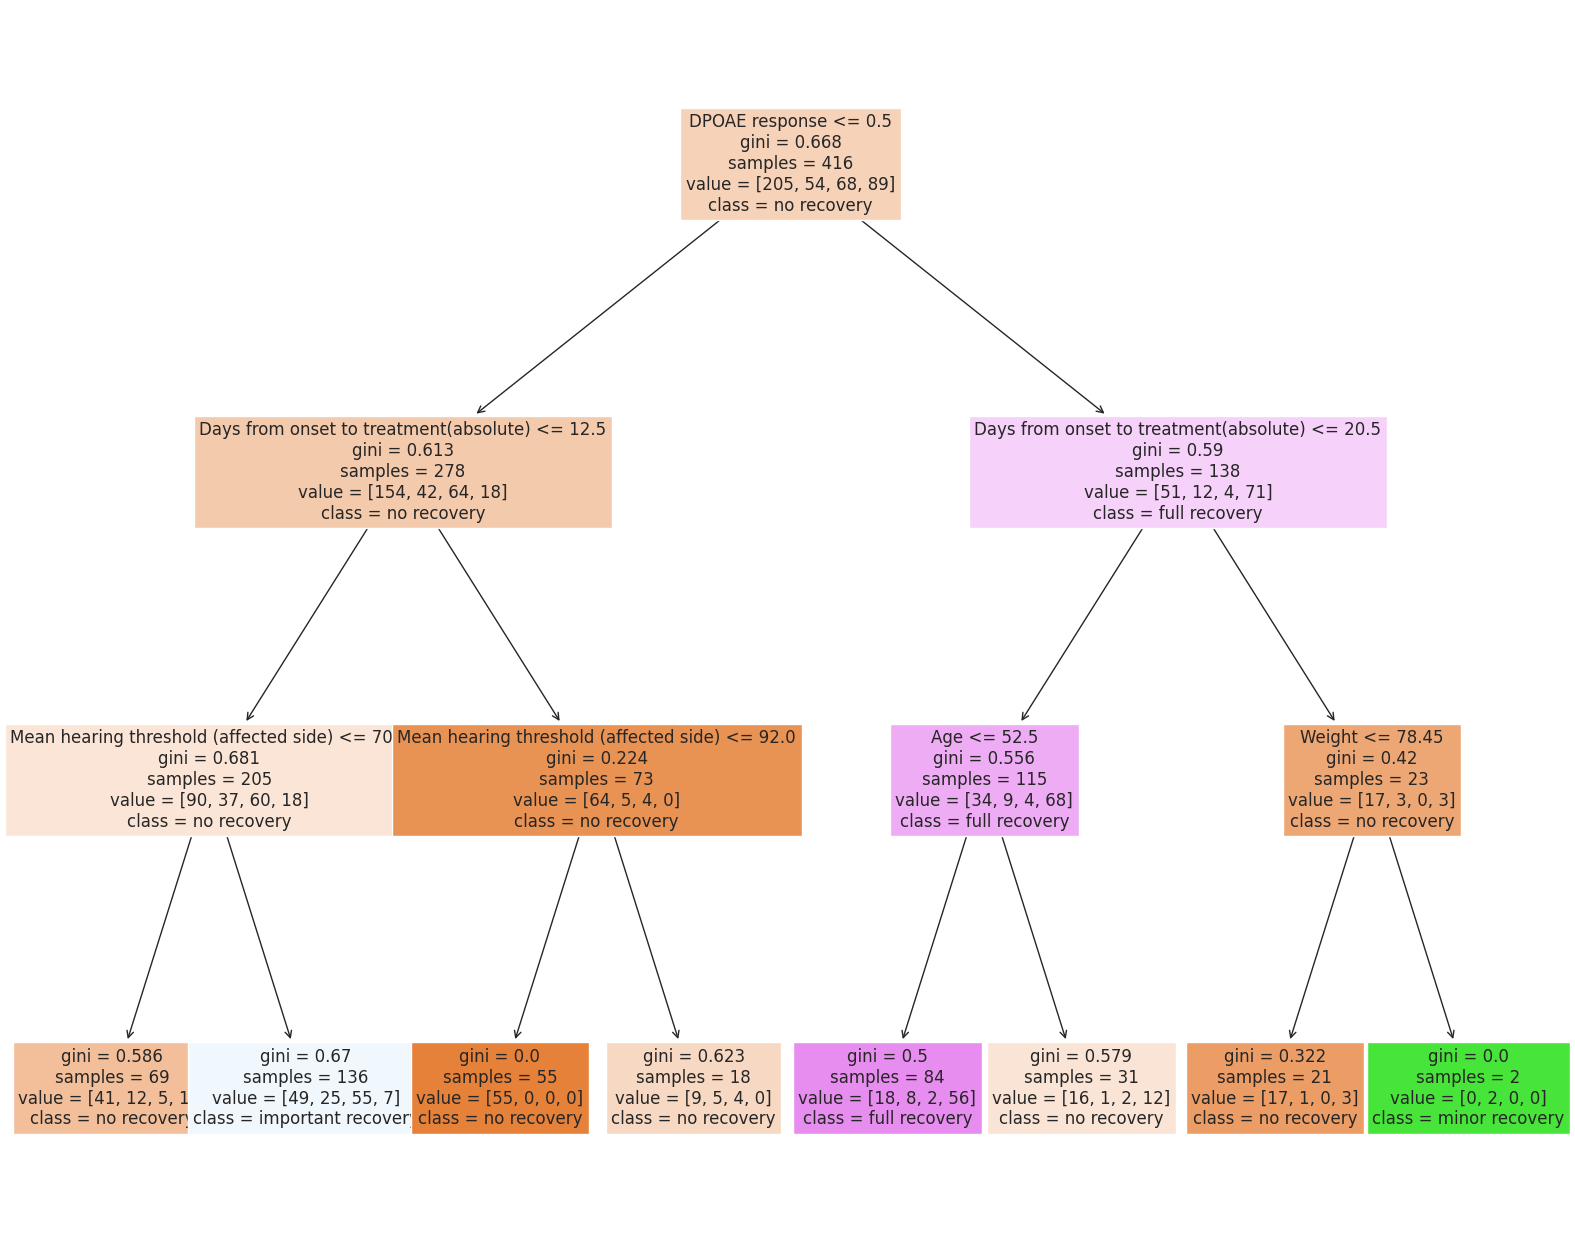

In [13]:
import dalex as dx
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

from ssnhl.util import load_data

def predict_function(model, data):
    return model.predict(data)


def explain(data_path, preprocess_func, output_path=None):
    X, y, filter_data = load_data(data_path, preprocess_func)
    targets = {
        "minor": {0: 0, 1: 1, 2: 1, 3: 1},
        "important": {0: 0, 1: 0, 2: 1, 3: 1},
        "full": {0: 0, 1: 0, 2: 0, 3: 1},
        "all": {0: 0, 1: 1, 2: 2, 3: 3},
    }

    for target in targets:
        _y = y.copy()
        target_map = targets[target]
        for origin_class in target_map:
            _y[_y == origin_class] = target_map[origin_class]

        clf = RandomForestClassifier(n_estimators=500, max_features=0.25, criterion='entropy', oob_score=True, random_state=42)
        clf.fit(X, _y)

        n_features = [
            tree.n_features_in_
            for _, tree in enumerate(clf.estimators_)
        ]
        print('{} variables were used in each tree'.format(n_features))
        print('oob_error_rate: {}'.format(1 - clf.oob_score_))

        surrogate_model = dx.Explainer(
            clf, data=X, y=_y, predict_function=predict_function
        ).model_surrogate(type='tree', max_depth=3, max_vars=None, random_state=42)
        display(surrogate_model.performance)

        fig, ax = plt.subplots(figsize=(20, 16))
        tree.plot_tree(
            surrogate_model,
            feature_names=filter_data.columns,
            class_names=["no recovery", "minor recovery", "important recovery", "full recovery"],
            filled=True,
            ax=ax,
            fontsize=12
        )
        if output_path:
            plt.savefig(output_path + '{}_tree.pdf'.format(target), bbox_inches="tight")

explain("../raw_data/all.xlsx", "default", '../output/control/')